In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

2. Remove dodgy images

In [139]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [15]:
import cv2


In [16]:
data_dir = 'data' 

Load Data

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 302 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

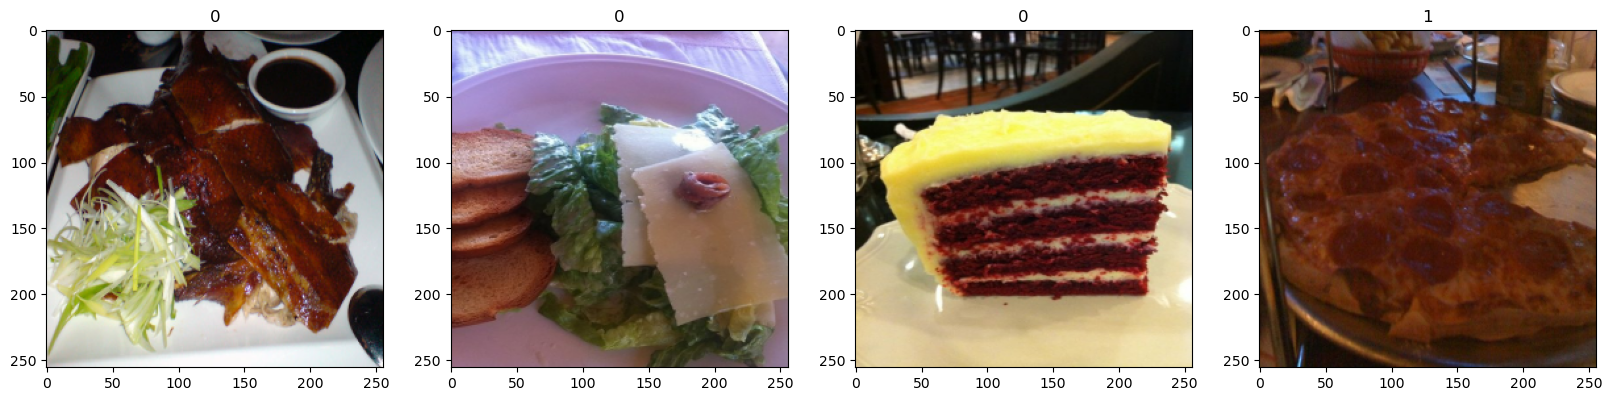

In [21]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale data

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[3.67647052e-01, 4.46078420e-01, 3.45098048e-01],
          [3.72058809e-01, 4.35784310e-01, 3.46568614e-01],
          [3.92156869e-01, 4.41176474e-01, 3.66176456e-01],
          ...,
          [4.37745094e-01, 4.36274499e-01, 3.28431368e-01],
          [4.61764693e-01, 4.59803909e-01, 3.38235289e-01],
          [5.04411757e-01, 4.96568620e-01, 3.72058809e-01]],
 
         [[3.45588237e-01, 4.25000012e-01, 3.06862742e-01],
          [3.41176480e-01, 4.07352954e-01, 3.00980389e-01],
          [3.43627453e-01, 3.96568626e-01, 3.03921580e-01],
          ...,
          [5.97058833e-01, 6.13725483e-01, 5.09313703e-01],
          [5.44117630e-01, 5.63725471e-01, 4.56372559e-01],
          [5.19117653e-01, 5.44607818e-01, 4.38725501e-01]],
 
         [[3.14705878e-01, 3.95098031e-01, 2.50000000e-01],
          [2.80882359e-01, 3.50980401e-01, 2.14705884e-01],
          [2.63725489e-01, 3.24509799e-01, 2.00980395e-01],
          ...,
          [4.70588237e-01, 5.05392134e-01, 4.2254

Split Data

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size

7

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [27]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 0.7878 - accuracy: 0.5045 - val_loss: 0.6619 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 6s 863ms/step - loss: 0.6414 - accuracy: 0.6205 - val_loss: 0.6697 - val_accuracy: 0.5469
Epoch 3/20
7/7 [==============================] - 6s 856ms/step - loss: 0.6084 - accuracy: 0.6562 - val_loss: 0.7067 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 6s 858ms/step - loss: 0.6120 - accuracy: 0.6339 - val_loss: 0.5843 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 6s 859ms/step - loss: 0.5746 - accuracy: 0.6652 - val_loss: 0.5246 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 6s 860ms/step - loss: 0.4901 - accuracy: 0.7812 - val_loss: 0.4204 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 6s 863ms/step - loss: 0.4603 - accuracy: 0.8036 - val_loss: 0.3793 - val_accuracy: 0.8438
Epoch 8/20
7/7 [=======

Plot Performance

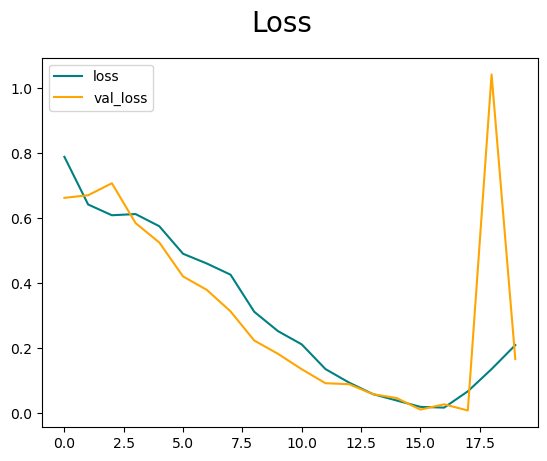

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

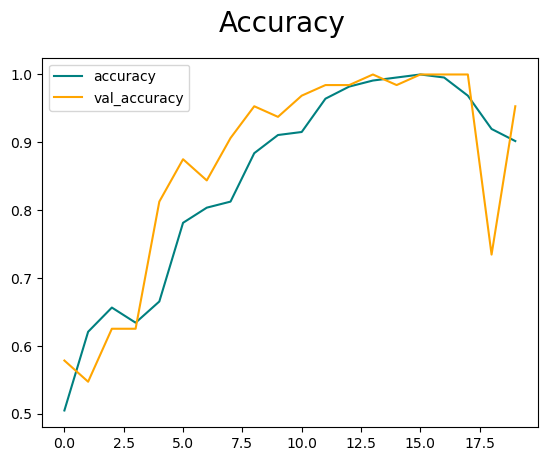

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

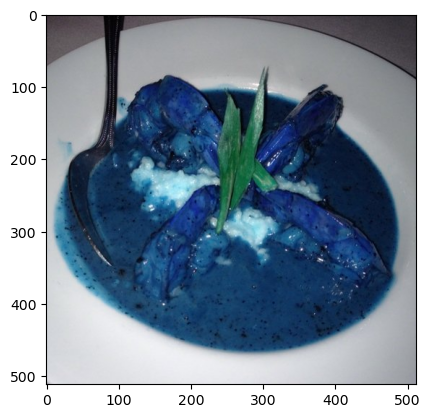

In [38]:
import cv2 
img = cv2.imread('data2/not pizza2/1919844.jpg')

plt.imshow(img)
plt.show()

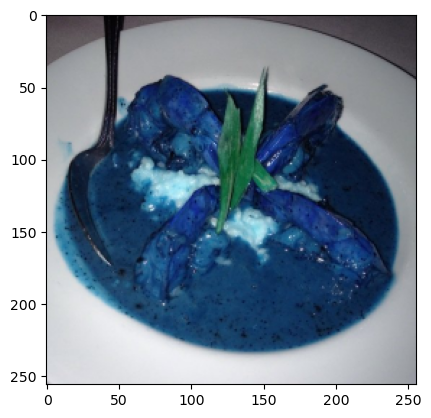

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 232ms/step


In [41]:
yhat

array([[0.00176549]], dtype=float32)

In [42]:
if yhat > 0.5: 
    print(f'Predicted class is Pizza')
else:
    print(f'Predicted class is Not pizza')

Predicted class is Not pizza


Save the Model

In [43]:
from tensorflow.keras.models import load_model

In [45]:
model.save('imageclassifier.h5')

In [46]:
new_model = load_model('models/imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 175ms/step


array([[0.00176549]], dtype=float32)